In [1]:
# Slow translation + translation

In [2]:
%matplotlib inline

# import statements
import numpy as np
import matplotlib.pyplot as plt #for figures
from mpl_toolkits.basemap import Basemap #to render maps
import math

import positions
import geodyn, geodyn_trg, geodyn_static
import plot_data
import data

plt.rcParams['figure.figsize'] = (8.0, 3.0) # (15.0, 5.0) #size of figures
cm = plt.cm.get_cmap('viridis')

To model Aubert version, where one side is growing at lower rate than the other side. 

Translation velocity in this case is of same order of magnitude than growth rate.

For example, let's use v_t = 0.5 v_g

- growth: constant growth rate. exponent_growth = 1.
- growth rate: rICB/age_icb
- velocity_translation: 0.5 growth rate

In [3]:
age_ic_dim = 1e9 #in years
rICB_dim = 1221. #in km
v_g_dim = rICB_dim/age_ic_dim # in km/years
translation_velocity_dim = 0.8 *v_g_dim #in km/years
print("The growth rate is {0:.2e} km/years and the translation velocity {1:.2e} km/years".format(v_g_dim, translation_velocity_dim))

The growth rate is 1.22e-06 km/years and the translation velocity 9.77e-07 km/years


In [4]:
geodynModel = geodyn_trg.TranslationGrowthRotation()
units = None #we give them already dimensionless parameters. 
rICB = 1.
age_ic = 1.
omega = 0.8*np.pi # Rotation rates has to be in ]-np.pi, np.pi[
velocity_amplitude = translation_velocity_dim*age_ic_dim/rICB_dim
velocity_center = [0., 100.]#center of the eastern hemisphere
velocity = geodyn_trg.translation_velocity(velocity_center, velocity_amplitude)
exponent_growth = 1.

In [5]:
print("In the code, we need to use dimensionless parameters: \n rICB = {} \n age_ic = {} \n omega = {}\n velocity_amplitude = {} \n exponent_growth = {}".format(rICB, age_ic, omega, translation_velocity_dim*age_ic_dim/rICB_dim, exponent_growth))

In the code, we need to use dimensionless parameters: 
 rICB = 1.0 
 age_ic = 1.0 
 omega = 2.5132741228718345
 velocity_amplitude = 0.8 
 exponent_growth = 1.0


In [6]:
parameters = {'units': units,
              'time_unit': age_ic_dim, #in years
              'length_unit': rICB_dim*1e3, #in meters
              'rICB': rICB, 
              'tau_ic':age_ic,
              'vt': velocity,
              'exponent_growth': exponent_growth,
              'omega': omega}
geodynModel.set_parameters(parameters)
geodynModel.define_units()

## Visualise flow lines
with perfect sampling at the equator

===
== Evaluate value of proxy for all points of the data set 
= Geodynamic model isi Translation, Rotation and Growth
= Proxy is age
= Data set is Perfect sampling in the equatorial plane
= Proxy is evaluated for bt_point
= Number of points to examine: 17420


/usr/local/lib/python3.5/site-packages/scipy/integrate/_ode.py:1035: UserWarning: dopri5: step size becomes too small
  self.messages.get(idid, 'Unexpected idid=%s' % idid))


===


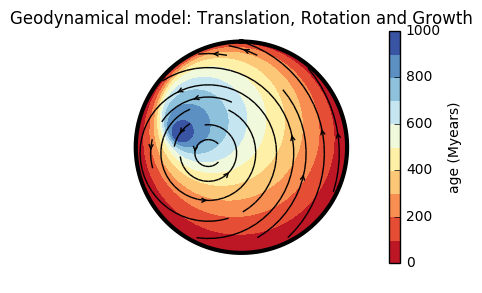

In [7]:
npoints = 150 #number of points in the x direction for the data set. 
data_set = data.PerfectSamplingEquator(npoints, rICB = 1.)
data_set.method = "bt_point"
proxy = geodyn.evaluate_proxy(data_set, geodynModel, proxy_type="age", verbose = False)
data_set.plot_c_vec(geodynModel, proxy=proxy, cm=plt.cm.get_cmap("RdYlBu"), nameproxy="age (Myears)")
plt.savefig("figures/flow_slow-translation-rot_random.pdf", bbox_inches='tight')

## Random repartition (in the first 100km)

### with proxy = age

===
== Evaluate value of proxy for all points of the data set 
= Geodynamic model isi Translation, Rotation and Growth
= Proxy is age
= Data set is Random repartition of data, between 0 and 100km depth
= Proxy is evaluated for bt_point
= Number of points to examine: 3000


/usr/local/lib/python3.5/site-packages/scipy/integrate/_ode.py:1035: UserWarning: dopri5: step size becomes too small
  self.messages.get(idid, 'Unexpected idid=%s' % idid))


===


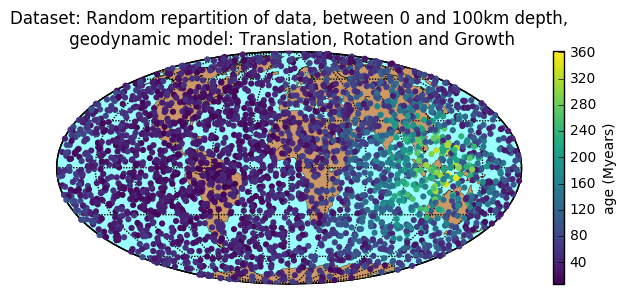

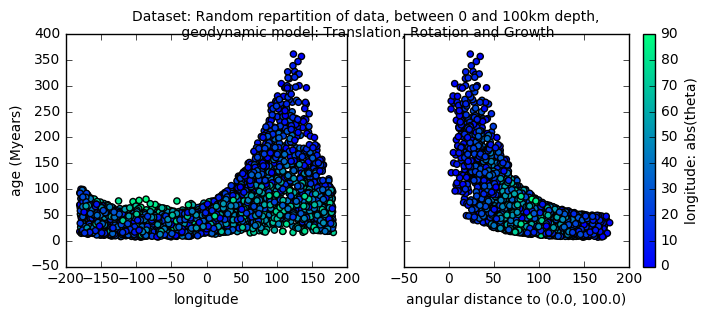

In [8]:
# random data set
data_set_random = data.RandomData(3000)
data_set_random.method = "bt_point"

proxy_random = geodyn.evaluate_proxy(data_set_random, geodynModel, proxy_type="age", verbose=False)
r, t, p = data_set_random.extract_rtp("bottom_turning_point")
dist = positions.angular_distance_to_point(t, p, *velocity_center)

## map
m, fig = plot_data.setting_map() 
x, y = m(p, t)
sc = m.scatter(x, y, c=proxy_random, zorder=10, cmap=cm, edgecolors='none')
plt.title("Dataset: {},\n geodynamic model: {}".format(data_set_random.name, geodynModel.name))
cbar = plt.colorbar(sc)
cbar.set_label("age (Myears)")

## phi and distance plots
fig, ax = plt.subplots(1,2, sharey=True)
cm2 = plt.cm.get_cmap('winter')
sc1 = ax[0].scatter(p, proxy_random, c=abs(t), cmap=cm2, vmin =-0, vmax =90)
ax[0].set_xlabel("longitude")
ax[0].set_ylabel("age (Myears)")
sc2 = ax[1].scatter(dist, proxy_random, c=abs(t), cmap=cm2, vmin=-0, vmax =90)
ax[1].set_xlabel("angular distance to ({}, {})".format(*velocity_center))
fig.suptitle("Dataset: {},\n geodynamic model: {}".format(data_set_random.name, geodynModel.name))
cbar = fig.colorbar(sc2)
cbar.set_label("longitude: abs(theta)")


### with proxy = growth rate

===
== Evaluate value of proxy for all points of the data set 
= Geodynamic model isi Translation, Rotation and Growth
= Proxy is growth rate
= Data set is Random repartition of data, between 0 and 100km depth
= Proxy is evaluated for bt_point
= Number of points to examine: 3000


/usr/local/lib/python3.5/site-packages/scipy/integrate/_ode.py:1035: UserWarning: dopri5: step size becomes too small
  self.messages.get(idid, 'Unexpected idid=%s' % idid))


===


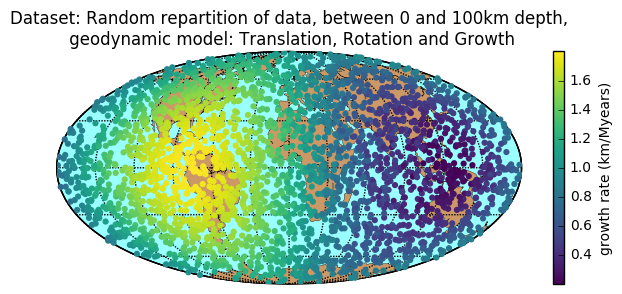

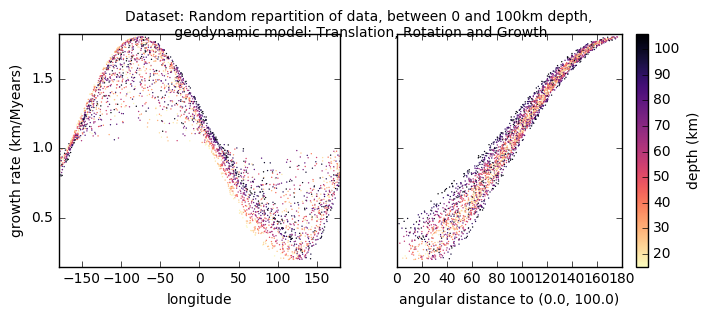

In [9]:
# random data set
data_set_random = data.RandomData(3000)
data_set_random.method = "bt_point"

proxy_random = geodyn.evaluate_proxy(data_set_random, geodynModel, proxy_type="growth rate", verbose=False)
r, t, p = data_set_random.extract_rtp("bottom_turning_point")
dist = positions.angular_distance_to_point(t, p, *velocity_center)

## map
m, fig = plot_data.setting_map() 
x, y = m(p, t)
sc = m.scatter(x, y, c=proxy_random, zorder=10, cmap=cm, edgecolors='none')
plt.title("Dataset: {},\n geodynamic model: {}".format(data_set_random.name, geodynModel.name))
cbar = plt.colorbar(sc)
cbar.set_label("growth rate (km/Myears)")
fig.savefig("figures/map_slow-translation_random.pdf", bbox_inches='tight')

## phi and distance plots
fig, ax = plt.subplots(1,2, sharey=True)
cm2 = plt.cm.get_cmap('magma_r')
sc1 = ax[0].scatter(p, proxy_random, c=abs((1-r)*1221), cmap=cm2, s=1, linewidth=0)
ax[0].set_xlabel("longitude")
ax[0].set_ylabel("growth rate (km/Myears)")
sc2 = ax[1].scatter(dist, proxy_random, c=abs((1-r)*1221), cmap=cm2, s=1, linewidth=0)
ax[1].set_xlabel("angular distance to ({}, {})".format(*velocity_center))
fig.suptitle("Dataset: {},\n geodynamic model: {}".format(data_set_random.name, geodynModel.name))
cbar = fig.colorbar(sc2)
cbar.set_label("depth (km)")
ax[0].set_xlim([-180,180])
ax[1].set_xlim([0,180])
ax[0].set_ylim([0.15, 1.82])
#ax[0].set_ylim([0., 2.5e-3])
fig.savefig("figures/dist_slow-translation-rot_random.pdf", bbox_inches='tight')

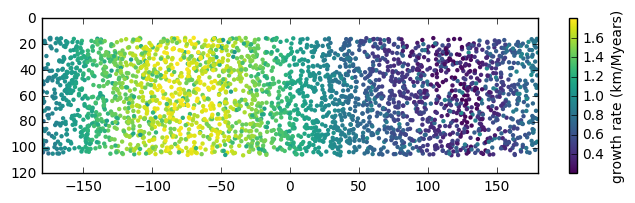

In [10]:
fig, ax = plt.subplots(figsize=(8, 2))
sc=ax.scatter(p,rICB_dim*(1.-r), c=proxy_random, s=10,cmap=cm, linewidth=0)
ax.set_ylim(-0,120)
fig.gca().invert_yaxis()
ax.set_xlim(-180,180)
cbar = fig.colorbar(sc)
cbar.set_label("growth rate (km/Myears)")

fig.savefig("figures/depth_slow-translation-rot_random.pdf", bbox_inches='tight')

===
== Evaluate value of proxy for all points of the data set 
= Geodynamic model isi Translation, Rotation and Growth
= Proxy is growth rate
= Data set is Random repartition of data, between 0 and 100km depth
= Proxy is evaluated for bt_point
= Number of points to examine: 3000


/usr/local/lib/python3.5/site-packages/scipy/integrate/_ode.py:1035: UserWarning: dopri5: step size becomes too small
  self.messages.get(idid, 'Unexpected idid=%s' % idid))


===


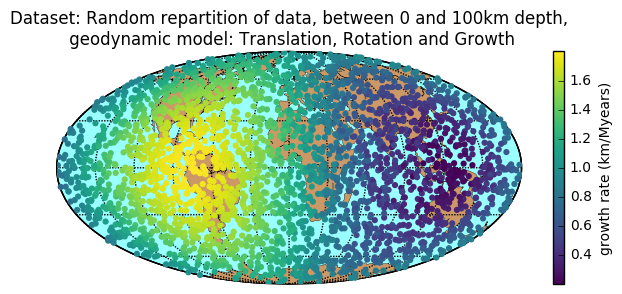

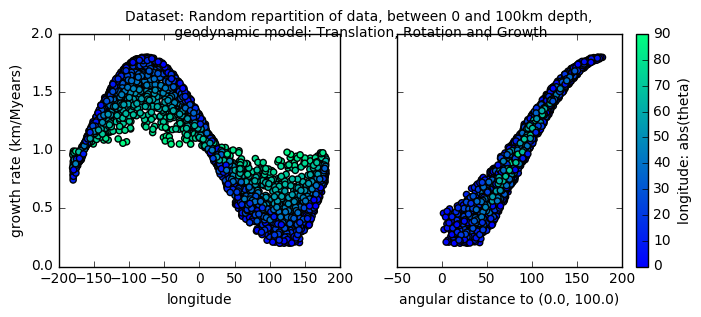

In [11]:
proxy_random = geodyn.evaluate_proxy(data_set_random, geodynModel, proxy_type="growth rate", verbose=False)
r, t, p = data_set_random.extract_rtp("bottom_turning_point")
dist = positions.angular_distance_to_point(t, p, *velocity_center)

## map
m, fig = plot_data.setting_map() 
x, y = m(p, t)
sc = m.scatter(x, y, c=proxy_random, zorder=10, cmap=cm, edgecolors='none')
plt.title("Dataset: {},\n geodynamic model: {}".format(data_set_random.name, geodynModel.name))
cbar = plt.colorbar(sc)
cbar.set_label("growth rate (km/Myears)")
fig.savefig("figures/map_slow-translation_random.pdf", bbox_inches='tight')

## phi and distance plots
fig, ax = plt.subplots(1,2, sharey=True)
cm2 = plt.cm.get_cmap('winter')
sc1 = ax[0].scatter(p, proxy_random, c=abs(t), cmap=cm2, vmin =-0, vmax =90)
ax[0].set_xlabel("longitude")
ax[0].set_ylabel("growth rate (km/Myears)")
sc2 = ax[1].scatter(dist, proxy_random, c=abs(t), cmap=cm2, vmin=-0, vmax =90)
ax[1].set_xlabel("angular distance to ({}, {})".format(*velocity_center))
fig.suptitle("Dataset: {},\n geodynamic model: {}".format(data_set_random.name, geodynModel.name))
cbar = fig.colorbar(sc2)
cbar.set_label("longitude: abs(theta)")
#ax[0].set_ylim([0., 2.5e-3])
fig.savefig("figures/dist_slow-translation_random.pdf", bbox_inches='tight')

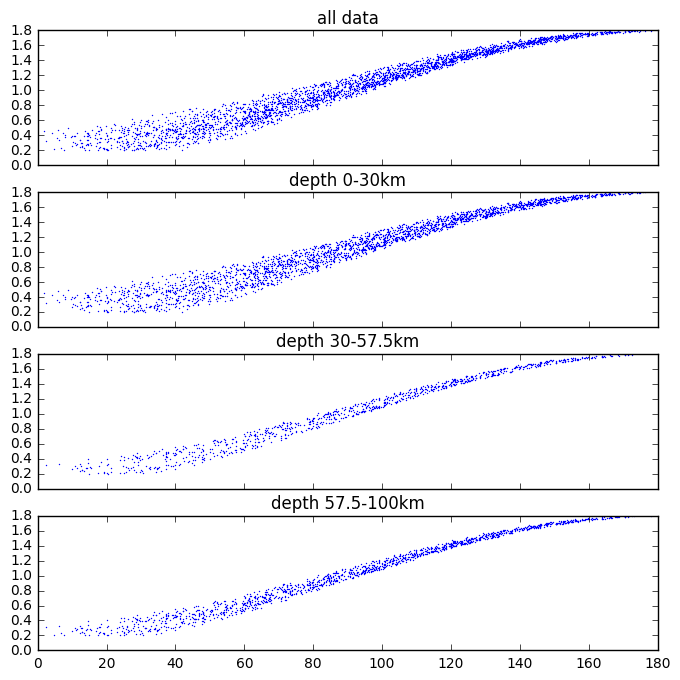

In [12]:
fig, ax = plt.subplots(4,1, sharex=True, sharey=True,figsize=(8, 8))
cm = plt.cm.get_cmap('viridis')
depth = (1-r)*1221.
ax[0].scatter(dist, proxy_random, s=1,cmap=cm, linewidth=0)
mask_0_30 = depth<30
mask_30_575 = np.ma.getmask(np.ma.masked_outside(depth,30, 57.5))
mask_575_100 = depth>57.5
#print(mask_0_30.shape, dist.shape, np.ma.array(dist, mask=mask_0_30))
ax[1].scatter(np.ma.array(dist, mask=mask_0_30), proxy_random, s=1,cmap=cm, linewidth=0)
ax[2].scatter(np.ma.array(dist, mask=mask_30_575), proxy_random, s=1,cmap=cm, linewidth=0)
ax[3].scatter(np.ma.array(dist, mask=mask_575_100), proxy_random, s=1,cmap=cm, linewidth=0)
#ax[1].scatter(np.ma.array(p,mask=mask_south),rICB_dim*(1.-r), c=proxy2, s=10,cmap=cm, linewidth=0.5)
#mask_north = t<-10
#ax[2].scatter(np.ma.array(p,mask=mask_north),rICB_dim*(1.-r), c=proxy2, s=10,cmap=cm, linewidth=0.5)
##mask_equator = np.ma.getmask(np.ma.masked_outside(t, -15,15))
#ax[3].scatter(np.ma.array(p,mask=mask_equator),rICB_dim*(1.-r), c=proxy2, s=10,cmap=cm, linewidth=0.5)
#fig.gca().invert_yaxis()
ax[0].set_xlim(0,180)
ax[0].set_ylim(0.,1.8)
ax[0].set_title("all data")
ax[1].set_title("depth 0-30km")
ax[2].set_title("depth 30-57.5km")
ax[3].set_title("depth 57.5-100km")
fig.savefig("figures/dist_severaldepths_TransRot_random.pdf", bbox_inches='tight')

In [13]:
data_meshgrid = data.Equator_upperpart(50,50)
data_meshgrid.method = "bt_point"
proxy_meshgrid = geodyn.evaluate_proxy(data_meshgrid, geodynModel, proxy_type="growth rate", verbose = False)
r, t, p = data_meshgrid.extract_rtp("bottom_turning_point")

===
== Evaluate value of proxy for all points of the data set 
= Geodynamic model isi Translation, Rotation and Growth
= Proxy is growth rate
= Data set is Meshgrid at the equator between 0 and 120km depth
= Proxy is evaluated for bt_point
= Number of points to examine: 2500


/usr/local/lib/python3.5/site-packages/scipy/integrate/_ode.py:1035: UserWarning: dopri5: step size becomes too small
  self.messages.get(idid, 'Unexpected idid=%s' % idid))


===


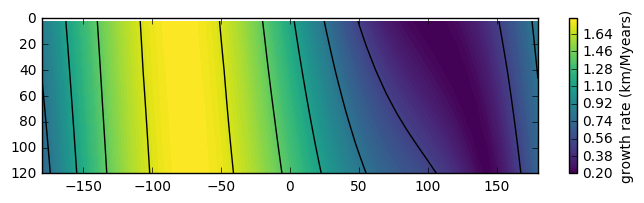

In [14]:
fig3, ax3 = plt.subplots(figsize=(8, 2))
X, Y, Z  = data_meshgrid.mesh_RPProxy(proxy_meshgrid)
sc = ax3.contourf(Y, rICB_dim*(1.-X), Z, 100, cmap=cm)
sc2 = ax3.contour(sc, levels=sc.levels[::15], colors = "k")
ax3.set_ylim(-0, 120)
fig3.gca().invert_yaxis()
ax3.set_xlim(-180,180)
cbar = fig3.colorbar(sc)
#cbar.set_clim(0, maxAge)
#cbar.set_clim(0, maxAge)
cbar.set_label("growth rate (km/Myears)")

plt.savefig("figures/meshgrid_slowtranslation_rotation.pdf", bbox_inches='tight')